In [1]:
import pandas as pd
import os
from scipy import stats
import numpy as np
from os import listdir

In [46]:
# Change working dir
os.chdir('/Users/alvis/Desktop/6756/6756 Project 2/Project 2 QuantFund/') 
os.getcwd()

'/Users/alvis/Desktop/6756/6756 Project 2/Project 2 QuantFund'

# 1.Data Preprocessing

# 1.1 Reformat Returns to a Single Column

In [25]:
csv_path = "Data/"
stockclose = "StockClosePrice"
indexclose = "IndexClosePrice"

forward_day = 5 # this should depend on your rolling period

# Calculate the forward returns
stock = pd.read_csv(stockclose + ".csv", index_col = 0, parse_dates = True)
stockforward = stock.shift(periods = -forward_day, freq = None, axis = 0)
# 5Dforward(t) = (close_price(t+5)-close_price(t))/close_price(t)
stockforwardreturn = (stockforward - stock) / stock

In [26]:
# Print all the factor documents in the folder
factor_folder = "0 All_factors" 
os.listdir(factor_folder)
factor_list = set(os.listdir(factor_folder)) - set(['.DS_Store'])
factor_list = list(factor_list)

factors_df = pd.read_csv(factor_folder +"/"+ factor_list[1],index_col = 0, parse_dates = True)
# Select date
factors_df = factors_df['2014-01':]

In [27]:
# Match stock return date range and stock list with factor tables
### Time horizon = 5 years
select_date = stockforwardreturn['2014-01':'2018-07-05']
select_date = select_date[factors_df.columns.values]

In [28]:
# Transfer full_data to one column
full_return = pd.DataFrame(index=range(len(select_date.index)*len(select_date.columns)),columns = ['date','stock','return'])
full_return['return'] = np.array(select_date).reshape((len(select_date.index)*len(select_date.columns),))
full_return.date = select_date.index.values.repeat(len(select_date.columns))

tmp = select_date.copy()
for i in range(len(tmp.index)):
    full_return.stock.iloc[i*len(tmp.columns):(i+1)*len(tmp.columns)] = select_date.columns[:].values

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
# Export to csv
full_return.to_csv('fiveyear_return.csv')

In [30]:
full_return

,date,stock,return
0,2014-01-02,000001.SZ,-0.033524
1,2014-01-02,000002.SZ,-0.066333
2,2014-01-02,000004.SZ,0.027941
3,2014-01-02,000005.SZ,-0.044178
4,2014-01-02,000006.SZ,-0.133471
...,...,...,...
3925895,2018-07-05,603993.SH,0.128308
3925896,2018-07-05,603996.SH,0.024205
3925897,2018-07-05,603997.SH,0.000000
3925898,2018-07-05,603998.SH,0.061930


# 1.2 Reformat All Factors and Concatenate with Returns

In [33]:
factor_list

['ROAEBITTTM.csv',
 'MoneyFlow20.csv',
 'EMA26.csv',
 'AD.csv',
 'DAVOL20.csv',
 'PE.csv',
 'LongTermDebtToAsset.csv',
 'GREV.csv',
 'TVSTD20.csv',
 'ILLIQUIDITY.csv',
 'InformationRatio60.csv',
 'TVMA6.csv',
 'FinancialExpenseRate.csv',
 'TVMA20.csv',
 'MktValue.csv',
 'ROE5.csv',
 'SalesExpenseTTM.csv',
 'PBIndu.csv',
 'SUE.csv',
 'InformationRatio120.csv',
 'SalesCostRatio.csv',
 'STOM.csv',
 'PCFIndu.csv',
 'REVS750.csv',
 'GainVariance120.csv',
 'GainVariance20.csv',
 'PSIndu.csv',
 'RealizedVolatility.csv',
 'GainLossVarianceRatio60.csv',
 'VEMA10.csv',
 'PEIndu.csv',
 'GainLossVarianceRatio120.csv',
 'NonOperatingNPTTM.csv',
 'SBM.csv',
 'PEHist60.csv',
 'Price1Y.csv',
 'DAREV.csv',
 'GainLossVarianceRatio20.csv',
 'ATR14.csv',
 'InterestCover.csv',
 'NonCurrentAssetsRatio.csv',
 'SaleServiceRenderCashTTM.csv',
 'PEHist120.csv',
 'PEHist250.csv']

In [31]:
return_ = full_return.copy()

In [32]:
# Read all the factors file
names = locals()

for factor_file in (factor_list[:]):
    df = pd.read_csv(factor_folder +"/"+ factor_file,index_col = 0, parse_dates = True)
    # Select date
    df = df['2014-01':]
    names[factor_file[:-4]]= np.array(df).reshape((3925900,))
    return_[factor_file[:-4]] = names[factor_file[:-4]]

In [34]:
fulldataset = return_

In [35]:
fulldataset

,date,stock,return,ROAEBITTTM,MoneyFlow20,EMA26,AD,DAVOL20,PE,LongTermDebtToAsset,...,PEHist60,Price1Y,DAREV,GainLossVarianceRatio20,ATR14,InterestCover,NonCurrentAssetsRatio,SaleServiceRenderCashTTM,PEHist120,PEHist250
0,2014-01-02,000001.SZ,-0.033524,NaN,6.834205e+09,6.8635,1825.3303,-0.0075,7.8348,0.0000,...,1.0800,0.0203,0.0421,1.7893,0.2474,NaN,NaN,0.000000e+00,1.1459,1.0896
1,2014-01-02,000002.SZ,-0.066333,0.0600,7.984906e+09,7.0356,4144.1979,-0.0028,6.4563,0.0794,...,0.9131,-0.2082,0.0129,1.1788,0.3369,5.4083,0.0423,1.441513e+11,0.8475,0.7291
2,2014-01-02,000004.SZ,0.027941,0.0781,1.810435e+08,11.5883,431.7118,-0.0158,299.3540,0.0037,...,0.9527,0.0857,NaN,0.0981,0.3098,-25.2095,0.2658,9.952084e+07,0.9018,0.8624
3,2014-01-02,000005.SZ,-0.044178,0.0290,2.872919e+08,2.5474,158.8882,-0.0044,355.2260,0.0003,...,1.1693,-0.0582,NaN,0.5765,0.0611,1.6928,0.8333,8.570411e+07,1.8429,6.4589
4,2014-01-02,000006.SZ,-0.133471,0.0871,1.137570e+09,4.6997,931.1356,-0.0036,10.3446,0.2493,...,0.9317,0.0488,0.0388,1.5260,0.1635,8.5611,0.1702,3.187453e+09,0.9925,0.9494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3925895,2018-07-05,603993.SH,0.128308,0.0734,9.249514e+09,6.8902,5720.1244,-0.0076,32.9219,0.3744,...,0.7015,-0.2202,0.0593,0.3060,0.2836,13.6598,0.5786,2.605600e+10,0.4997,0.4138
3925896,2018-07-05,603996.SH,0.024205,0.0571,3.354802e+09,13.5914,323.5775,0.0945,20.9605,0.0000,...,0.6338,-0.3648,NaN,0.5342,1.0402,4.9616,0.1238,5.963712e+09,0.5709,0.5322
3925897,2018-07-05,603997.SH,0.000000,0.1799,NaN,NaN,NaN,NaN,23.2890,0.0026,...,0.9462,NaN,-0.1068,1.4126,NaN,-134.3896,0.2743,2.015231e+09,0.9439,0.8765
3925898,2018-07-05,603998.SH,0.061930,0.0620,4.591159e+08,8.9899,89.6642,-0.0012,50.1448,0.0379,...,0.8525,-0.3732,NaN,1.3197,0.4372,-109.1636,0.6165,8.327627e+08,0.9275,0.7927


In [ ]:
# Export to csv
fulldataset.to_csv('fiveyear_dataset.csv')

# 1.3 Data Cleaning

In [3]:
# Import and normalize data
full_data = pd.read_csv('fiveyear_dataset.csv',index_col=0)
full_val = full_data.copy()
for i in range(3,len(full_val.columns)):
    full_val.iloc[:,i] = (full_val.iloc[:,i] - np.mean(full_val.iloc[:,i]))/np.std(full_val.iloc[:,i])
full_val

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,date,stock,return,NonOperatingNPTTM,GainVariance20,VEMA10,RealizedVolatility,NonCurrentAssetsRatio,ILLIQUIDITY,GainLossVarianceRatio120,...,MoneyFlow20,Price1Y,DAVOL20,SalesCostRatio,SUE,GainVariance120,TVMA6,TVSTD20,MktValue,InformationRatio120
0,2014-01-02,000001.SZ,-0.033524,-0.062840,-0.008459,0.941919,0.092579,NaN,-0.035053,-0.006972,...,0.421188,-0.112819,-0.268339,-0.056661,0.110873,-0.015007,0.942812,0.522405,1.440810,-0.011529
1,2014-01-02,000002.SZ,-0.066333,0.057812,-0.010528,1.121147,-0.080334,-1.854092,-0.035048,-0.007097,...,0.569449,-0.892259,-0.036786,-0.023118,0.160818,-0.025521,0.591433,-0.030947,1.027610,-0.011555
2,2014-01-02,000004.SZ,0.027941,-0.175438,-0.011029,-0.373650,0.338981,-0.786145,-0.022779,-0.007133,...,-0.436034,0.110268,-0.677252,-0.077090,-0.038448,-0.020865,-0.437080,-0.479655,-0.237144,-0.011534
3,2014-01-02,000005.SZ,-0.044178,-0.155829,-0.010690,-0.297892,-0.452098,1.925534,-0.028205,-0.007041,...,-0.422345,-0.380591,-0.115612,-0.062029,0.034915,-0.025344,-0.438071,-0.439084,-0.218469,-0.011536
4,2014-01-02,000006.SZ,-0.133471,-0.151001,-0.008584,-0.155589,-0.417515,-1.242949,-0.032297,-0.007206,...,-0.312791,-0.015602,-0.076199,-0.090916,0.098342,-0.029153,-0.360914,-0.347821,-0.156003,-0.011534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3925895,2018-07-05,603993.SH,0.128308,-0.180494,-0.009316,1.380514,0.265493,0.708504,-0.034838,-0.007099,...,0.732387,-0.933192,-0.273266,-0.047586,0.383775,-0.015438,0.435944,0.148431,1.509602,-0.011538
3925896,2018-07-05,603996.SH,0.024205,-0.174295,-0.000433,0.234720,1.121414,-1.464662,-0.032299,-0.007232,...,-0.027114,-1.426440,4.756858,0.096086,0.425272,-0.024269,0.196866,0.261074,-0.204706,-0.011545
3925897,2018-07-05,603997.SH,0.000000,-0.168566,-0.008924,NaN,-0.080334,-0.745529,-0.031696,-0.007181,...,NaN,NaN,NaN,-0.017749,0.183302,-0.028469,NaN,NaN,-0.150806,-0.011539
3925898,2018-07-05,603998.SH,0.061930,-0.164434,0.000450,-0.328367,0.931209,0.889601,-0.025528,-0.007144,...,-0.400206,-1.455093,0.042041,-0.168026,-0.193069,-0.024977,-0.412292,-0.454102,-0.204020,-0.011554


In [21]:
### Extract records bound in date constraint for testing

# start_date = '2018-01-01'
# end_date = '2018-07-06'

# full_val['date'] = pd.to_datetime(full_val['date'])
# mask = (full_val['date'] > start_date) & (full_val['date'] <= end_date)
# full_val= full_val.loc[mask]
# full_val

,date,stock,return,NonOperatingNPTTM,GainVariance20,VEMA10,RealizedVolatility,NonCurrentAssetsRatio,ILLIQUIDITY,GainLossVarianceRatio120,...,MoneyFlow20,Price1Y,DAVOL20,SalesCostRatio,SUE,GainVariance120,TVMA6,TVSTD20,MktValue,InformationRatio120
3486913,2018-01-02,000001.SZ,-0.045255,0.073779,-0.006886,3.456145,12.754163,NaN,-0.035203,-0.006988,...,4.400156,0.908129,0.120868,0.001967,0.053919,-0.029229,3.748204,2.456457,3.167440,-0.011528
3486914,2018-01-02,000002.SZ,0.100737,0.640921,-0.000328,0.824298,11.383824,-1.499543,-0.035178,-0.006775,...,2.987249,1.165327,0.076528,-0.013759,0.109228,-0.018816,2.476091,1.249088,4.972618,-0.011533
3486915,2018-01-02,000004.SZ,0.030439,-0.181762,0.003800,-0.370233,12.702289,-0.330774,-0.030563,-0.007180,...,-0.372155,-0.973102,-0.022006,-0.094337,0.514349,-0.023598,-0.426724,-0.403435,-0.224292,-0.011543
3486916,2018-01-02,000005.SZ,0.020838,-0.156560,-0.010632,-0.288835,13.895391,0.649253,-0.027186,-0.007138,...,-0.417219,-0.881684,-0.110686,-0.008817,0.164042,-0.031443,-0.427738,-0.453406,-0.185095,-0.011551
3486917,2018-01-02,000006.SZ,0.000000,-0.132077,-0.009148,NaN,12.793069,-1.314146,NaN,-0.007104,...,NaN,NaN,NaN,0.011042,0.114386,-0.028115,NaN,NaN,-0.058288,-0.011537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3925895,2018-07-05,603993.SH,0.128308,-0.180494,-0.009316,1.380514,0.265493,0.708504,-0.034838,-0.007099,...,0.732387,-0.933192,-0.273266,-0.047586,0.383775,-0.015438,0.435944,0.148431,1.509602,-0.011538
3925896,2018-07-05,603996.SH,0.024205,-0.174295,-0.000433,0.234720,1.121414,-1.464662,-0.032299,-0.007232,...,-0.027114,-1.426440,4.756858,0.096086,0.425272,-0.024269,0.196866,0.261074,-0.204706,-0.011545
3925897,2018-07-05,603997.SH,0.000000,-0.168566,-0.008924,NaN,-0.080334,-0.745529,-0.031696,-0.007181,...,NaN,NaN,NaN,-0.017749,0.183302,-0.028469,NaN,NaN,-0.150806,-0.011539
3925898,2018-07-05,603998.SH,0.061930,-0.164434,0.000450,-0.328367,0.931209,0.889601,-0.025528,-0.007144,...,-0.400206,-1.455093,0.042041,-0.168026,-0.193069,-0.024977,-0.412292,-0.454102,-0.204020,-0.011554


# 1.4 Select 5 Factors Based on Correlations with Returns

In [36]:
# To see the factors correlation and the correlation between return and factors
fulldataset.iloc[:,2:].corr()

,return,ROAEBITTTM,MoneyFlow20,EMA26,AD,DAVOL20,PE,LongTermDebtToAsset,GREV,TVSTD20,...,PEHist60,Price1Y,DAREV,GainLossVarianceRatio20,ATR14,InterestCover,NonCurrentAssetsRatio,SaleServiceRenderCashTTM,PEHist120,PEHist250
return,1.000000,0.007825,-0.046014,-0.048029,-0.014583,-0.026105,0.000023,-0.001953,0.011782,-0.043560,...,-0.000139,0.009392,0.000124,-0.004559,-0.023927,-0.002374,-0.008914,-0.001809,-0.000742,-0.000356
ROAEBITTTM,0.007825,1.000000,0.001452,0.138144,-0.060445,-0.023041,-0.000824,-0.699945,0.022708,0.010050,...,-0.000133,0.015646,0.002216,0.003511,0.075609,0.000347,-0.063437,-0.002904,0.000013,0.000080
MoneyFlow20,-0.046014,0.001452,1.000000,0.144871,0.242574,0.174726,-0.003006,0.021477,0.036231,0.890530,...,-0.000178,0.253096,0.000711,-0.001421,0.138312,-0.190597,0.019792,0.147316,0.000561,0.000201
EMA26,-0.048029,0.138144,0.144871,1.000000,-0.160397,-0.049931,-0.001345,-0.090927,0.039615,0.105048,...,-0.000476,0.088503,0.003192,0.004147,0.518142,0.009326,-0.173439,-0.026230,0.000399,0.000529
AD,-0.014583,-0.060445,0.242574,-0.160397,1.000000,0.029687,-0.002012,0.077645,0.005496,0.219859,...,-0.000117,0.010926,-0.001779,-0.002849,-0.104120,-0.347603,0.184958,0.251175,0.000249,-0.000516
DAVOL20,-0.026105,-0.023041,0.174726,-0.049931,0.029687,1.000000,-0.000069,0.021158,-0.009604,0.213994,...,0.000565,0.297849,0.002897,0.001896,0.064737,-0.005096,0.041151,0.009606,0.000431,0.000358
PE,0.000023,-0.000824,-0.003006,-0.001345,-0.002012,-0.000069,1.000000,-0.002312,0.001107,-0.003184,...,0.000160,-0.000816,0.000908,-0.000051,-0.002324,0.000467,-0.002411,-0.000906,0.000148,-0.001044
LongTermDebtToAsset,-0.001953,-0.699945,0.021477,-0.090927,0.077645,0.021158,-0.002312,1.000000,0.003694,0.018233,...,0.000312,0.001373,-0.002226,-0.000538,-0.055225,0.008655,0.105176,0.018240,0.000095,0.000272
GREV,0.011782,0.022708,0.036231,0.039615,0.005496,-0.009604,0.001107,0.003694,1.000000,0.035506,...,-0.000592,0.128096,0.022114,0.001135,0.036580,0.005871,0.005305,-0.002401,0.000464,-0.000917
TVSTD20,-0.043560,0.010050,0.890530,0.105048,0.219859,0.213994,-0.003184,0.018233,0.035506,1.000000,...,-0.000128,0.276699,0.000700,0.006729,0.147648,-0.181864,0.008706,0.141797,0.000542,0.000174


In [37]:
# To see the data quality due to null values
fulldataset.isna().sum().sort_values(ascending = False)

DAREV                       1791766
REVS750                     1571008
PCFIndu                     1544320
GREV                        1115034
PEIndu                      1085290
SBM                         1027686
MoneyFlow20                 1005962
ATR14                       1004860
AD                          1002738
TVSTD20                     1001132
STOM                        1000062
Price1Y                     1000062
VEMA10                      1000057
TVMA6                       1000056
DAVOL20                     1000056
TVMA20                      1000056
EMA26                       1000048
ILLIQUIDITY                  991595
InterestCover                971199
ROE5                         917239
SalesExpenseTTM              814863
ROAEBITTTM                   761611
FinancialExpenseRate         760216
NonCurrentAssetsRatio        758759
GainLossVarianceRatio120     722804
GainLossVarianceRatio20      722804
GainLossVarianceRatio60      722804
RealizedVolatility          

# 2. Predict Returns Based on Models

# 2.1 Linear Regression

In [4]:
# Linear Regression on 5 factors for 5 years
from sklearn import linear_model

# Factors are selected by running correlations tests with returns
# Null values are filled with 0
selected_factors = ['ILLIQUIDITY','InformationRatio60','SalesCostRatio','PEIndu','ROE5']

df_x = full_val[selected_factors]
df_x = df_x.fillna(0)
df_y = full_val.iloc[:,2]
df_y = df_y.fillna(0)
df_x

,ILLIQUIDITY,InformationRatio60,SalesCostRatio,PEIndu,ROE5
0,-0.035053,-0.011535,-0.056661,3.436024,1.002606
1,-0.035048,-0.011552,-0.023118,-0.604212,0.756695
2,-0.022779,-0.011540,-0.077090,3.457446,-0.002838
3,-0.028205,-0.011536,-0.062029,3.182271,-0.693571
4,-0.032297,-0.011533,-0.090916,-0.548593,0.740346
...,...,...,...,...,...
3925895,-0.034838,-0.011552,-0.047586,-0.399841,-0.041667
3925896,-0.032299,-0.011547,0.096086,-0.506653,0.197433
3925897,-0.031696,-0.011532,-0.017749,-0.421868,0.921544
3925898,-0.025528,-0.011550,-0.168026,0.114101,0.135444


In [43]:
# Initialize and fit the regressor
reg = linear_model.LinearRegression()
reg.fit(df_x,df_y)
lnreg = reg.predict(df_x)

In [45]:
# Reshape the output
lnreg_df = pd.DataFrame(lnreg.reshape(1100,3569))
lnreg_df.index = full_val.date.unique()
lnreg_df.columns = full_val.stock.unique()

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,603987.SH,603988.SH,603989.SH,603990.SH,603991.SH,603993.SH,603996.SH,603997.SH,603998.SH,603999.SH
2014-01-02,-0.003303,0.003702,-0.002502,-0.001711,0.003667,0.002678,0.002165,0.004220,0.001678,0.003429,...,0.003813,0.003813,0.003813,0.003813,0.003813,0.004235,0.003813,0.003813,0.003813,0.003813
2014-01-03,-0.003258,0.003714,-0.002480,-0.001631,0.003683,0.002686,0.002184,0.004205,0.001695,0.003446,...,0.003813,0.003813,0.003813,0.003813,0.003813,0.004249,0.003813,0.003813,0.003813,0.003813
2014-01-06,-0.003181,0.003732,-0.002442,-0.001535,0.003706,0.002603,0.002287,0.004188,0.001867,0.003472,...,0.003813,0.003813,0.003813,0.003813,0.003813,0.004278,0.003813,0.003813,0.003813,0.003813
2014-01-07,-0.003186,0.003732,-0.002451,-0.001521,0.003709,0.002502,0.002380,0.004190,0.001854,0.003473,...,0.003813,0.003813,0.003813,0.003813,0.003813,0.004286,0.003813,0.003813,0.003813,0.003813
2014-01-08,-0.003179,0.003735,-0.002340,-0.001482,0.003715,0.002459,0.002471,0.004192,0.001795,0.003491,...,0.003813,0.003813,0.003813,0.003813,0.003813,0.004305,0.003813,0.003813,0.003813,0.003813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-29,0.003573,0.003659,-0.000983,0.001250,0.004022,-0.000441,0.004366,0.003804,0.004400,0.003544,...,0.004169,0.002584,0.003776,0.003308,0.003062,0.003766,0.004079,0.003370,0.002767,0.002474
2018-07-02,0.003689,0.003682,-0.000675,0.001346,0.004044,-0.000426,0.004341,0.003811,0.004393,0.003574,...,0.004179,0.002446,0.003789,0.003348,0.003071,0.003776,0.003974,0.003362,0.002834,0.002511
2018-07-03,0.003676,0.003671,-0.000813,0.001386,0.004038,-0.000455,0.004345,0.003808,0.004389,0.003581,...,0.004192,0.002336,0.003845,0.003411,0.003079,0.003786,0.003884,0.003370,0.002802,0.002495
2018-07-04,0.003704,0.003660,-0.000861,0.001415,0.004016,-0.000529,0.004315,0.003809,0.004376,0.003539,...,0.004195,0.002430,0.003819,0.003356,0.003065,0.003801,0.003844,0.003361,0.002821,0.002464


In [46]:
# Export the output
lnreg_df.to_csv('lnreg_5Y_5F.csv')

# 2.2 SVM for Regression

In [7]:
#SVM on 5 factors for 5 years
from sklearn.svm import SVR
svm_reg = SVR(kernel='rbf',gamma='auto',max_iter=500)

In [27]:
# Fit the model and print runtime
import time
start_time = time.time()

svm_reg.fit(df_x,df_y)
svm = svm_reg.predict(df_x)

print("--- Runtime = %s seconds ---" % (round(time.time() - start_time, 2)))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


--- Runtime = 193.36 seconds ---


In [38]:
svm_df = pd.DataFrame(svm.reshape(1100,3569))
svm_df.index = full_val.date.unique()
svm_df.columns = full_val.stock.unique()
svm_df

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,603987.SH,603988.SH,603989.SH,603990.SH,603991.SH,603993.SH,603996.SH,603997.SH,603998.SH,603999.SH
2014-01-02,0.024961,0.056130,0.023703,0.020994,0.054587,0.011965,-0.001805,0.060218,-0.013116,0.057301,...,0.038749,0.038749,0.038749,0.038749,0.038749,0.057739,0.038749,0.038749,0.038749,0.038749
2014-01-03,0.024009,0.056449,0.022353,0.019479,0.055003,0.012224,-0.001316,0.059803,-0.012786,0.057671,...,0.038749,0.038749,0.038749,0.038749,0.038749,0.058063,0.038749,0.038749,0.038749,0.038749
2014-01-06,0.022380,0.056929,0.020380,0.017821,0.055605,0.009889,0.001159,0.059324,-0.009281,0.058208,...,0.038749,0.038749,0.038749,0.038749,0.038749,0.058726,0.038749,0.038749,0.038749,0.038749
2014-01-07,0.022489,0.056943,0.020163,0.018006,0.055651,0.006988,0.003547,0.059384,-0.009571,0.058210,...,0.038749,0.038749,0.038749,0.038749,0.038749,0.058934,0.038749,0.038749,0.038749,0.038749
2014-01-08,0.022343,0.057032,0.016967,0.017715,0.055810,0.005856,0.006019,0.059430,-0.010803,0.058529,...,0.038749,0.038749,0.038749,0.038749,0.038749,0.059380,0.038749,0.038749,0.038749,0.038749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-29,0.045216,0.056041,-0.008339,-0.016538,0.058197,-0.017434,0.068700,0.044916,0.048362,0.047845,...,0.059197,0.008208,0.055720,0.043031,0.028764,0.044806,0.055391,0.049160,0.016165,0.006254
2018-07-02,0.048624,0.056672,-0.012929,-0.015534,0.058733,-0.017503,0.068025,0.045101,0.048301,0.048602,...,0.059387,0.004707,0.055983,0.044062,0.029004,0.045105,0.052515,0.048934,0.018114,0.007217
2018-07-03,0.048242,0.056380,-0.010394,-0.015118,0.058522,-0.016990,0.068136,0.045009,0.048263,0.048822,...,0.059601,0.001930,0.057556,0.045592,0.029049,0.045409,0.050054,0.049160,0.017070,0.006769
2018-07-04,0.049052,0.056081,-0.008819,-0.014837,0.057922,-0.015907,0.067358,0.045027,0.048151,0.047634,...,0.059584,0.004395,0.056918,0.043983,0.028673,0.045853,0.049046,0.048925,0.017529,0.005959


In [30]:
svm_df.to_csv('svm_5Y_5F.csv')

# 2.3 Random Forest Regressor

In [39]:
# Initialize random forest regressor with 10 trees and maximum depth
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=10)

In [41]:
# Fit the model and print runtime
import time
start_time = time.time()

rf_reg.fit(df_x,df_y)
rf = rf_reg.predict(df_x)

print("--- Runtime = %s seconds ---" % (round(time.time() - start_time, 2)))


--- Runtime = 479.87 seconds ---


In [43]:
rf_df = pd.DataFrame(rf.reshape(1100,3569))
rf_df.index = full_val.date.unique()
rf_df.columns = full_val.stock.unique()
rf_df

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,603987.SH,603988.SH,603989.SH,603990.SH,603991.SH,603993.SH,603996.SH,603997.SH,603998.SH,603999.SH
2014-01-02,-0.034640,-0.029077,0.037427,-0.017630,-0.098819,-0.009004,-0.073469,-0.046107,-0.087756,-0.063682,...,0.000016,0.000016,0.000016,0.000016,0.000016,-0.076161,0.000016,0.000016,0.000016,0.000016
2014-01-03,-0.009687,-0.041470,-0.047194,-0.038232,-0.065355,-0.013287,-0.068910,-0.044046,-0.086932,-0.075900,...,0.000016,0.000016,0.000016,0.000016,0.000016,-0.067892,0.000016,0.000016,0.000016,0.000016
2014-01-06,-0.003251,-0.023879,-0.051258,-0.029675,-0.050167,-0.012421,-0.024206,-0.031829,-0.043985,-0.068557,...,0.000016,0.000016,0.000016,0.000016,0.000016,-0.002315,0.000016,0.000016,0.000016,0.000016
2014-01-07,-0.001347,-0.029070,-0.046002,-0.031829,-0.020445,-0.054616,0.015405,-0.024280,-0.051665,-0.066051,...,0.000016,0.000016,0.000016,0.000016,0.000016,-0.002302,0.000016,0.000016,0.000016,0.000016
2014-01-08,-0.014895,-0.031499,-0.041702,-0.021665,-0.014597,-0.049236,0.046036,0.005220,-0.076421,-0.029474,...,0.000016,0.000016,0.000016,0.000016,0.000016,-0.005369,0.000016,0.000016,0.000016,0.000016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-29,-0.041268,-0.035404,-0.023176,-0.019576,-0.048184,0.001854,-0.000004,-0.021410,0.014848,-0.055385,...,-0.023883,-0.044559,-0.092123,-0.016307,-0.059587,-0.060556,0.071790,0.000000,-0.096264,-0.054900
2018-07-02,-0.015698,0.035755,-0.005801,-0.000908,-0.020190,-0.002771,0.006857,0.012061,0.026799,-0.023372,...,0.060539,-0.052472,-0.059139,-0.007422,-0.036853,-0.036345,0.052494,0.000000,0.002695,-0.017096
2018-07-03,-0.030350,0.022569,-0.029274,-0.000878,-0.004777,0.026272,0.006857,-0.007709,0.062669,-0.019408,...,0.065869,-0.042233,-0.029147,-0.007442,-0.039099,0.001060,-0.049547,0.000000,-0.017887,-0.028287
2018-07-04,0.025515,0.015372,-0.021058,-0.025697,-0.022644,0.018633,-0.002380,-0.000738,0.020376,-0.048617,...,0.059574,-0.034293,-0.040289,-0.013509,-0.043089,0.024046,-0.066127,0.000000,-0.024533,-0.043026


In [44]:
rf_df.to_csv('rf_5Y_5F.csv')  

# 3. Cross Validation

In [5]:
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import svm

In [10]:
ln = linear_model.LinearRegression() # Linear regression model

svm_svr = SVR(kernel='rbf',max_iter = 500, gamma='auto')  # SVM model

forest = RandomForestRegressor(n_estimators = 10)#　Random Forest

In [11]:
# Five-fold cross validation
# Calculate the explained variance, mean absolute error and maximum error to evaluate the performance of models
def multi_score(model):
    cv_score = cross_val_score(model, df_x, df_y,cv=5)
    exp_variance = cross_val_score(model, df_x, df_y,scoring='explained_variance',cv=5)
    abs_error = cross_val_score(model,df_x,df_y,scoring = 'neg_mean_absolute_error',cv=5)
    max_error = cross_val_score(model,df_x,df_y,scoring = 'max_error',cv=5)
    return exp_variance,abs_error,max_error

In [12]:
exp_variance = pd.DataFrame(index = range(3),columns = ['method','F1','F2','F3','F4','F5'])
abs_error = pd.DataFrame(index = range(3),columns = ['method','F1','F2','F3','F4','F5'])
max_error = pd.DataFrame(index = range(3),columns = ['method','F1','F2','F3','F4','F5'])

In [13]:
exp_variance['method'] = ['linear regression','svm','random forest']
abs_error['method'] = ['linear regression','svm','random forest']
max_error['method'] = ['linear regression','svm','random forest']

In [14]:
exp_variance.iloc[0,1:] = multi_score(ln)[0]
abs_error.iloc[0,1:] = multi_score(ln)[1]
max_error.iloc[0,1:] = multi_score(ln)[2]

In [15]:
exp_variance.iloc[1,1:] = multi_score(svm_svr)[0]
abs_error.iloc[1,1:] = multi_score(svm_svr)[1]
max_error.iloc[1,1:] = multi_score(svm_svr)[2]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/s

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/s

In [16]:
exp_variance.iloc[2,1:] = multi_score(forest)[0]
abs_error.iloc[2,1:] = multi_score(forest)[1]
max_error.iloc[2,1:] = multi_score(forest)[2]

In [17]:
print('Explained Variance Table')
exp_variance

Explained Variance Table


,method,F1,F2,F3,F4,F5
0,linear regression,0.0123509,0.0250405,0.0512667,0.132966,0.0233394
1,svm,-0.210967,-0.566902,-0.0755076,-1.2466,-2.23136
2,random forest,-0.457476,-0.0123745,-0.0969389,-0.0839775,-0.279099


In [18]:
print('Mean Absolute Error Table')
abs_error

Mean Absolute Error Table


,method,F1,F2,F3,F4,F5
0,linear regression,-0.0290606,-0.0618622,-0.04356,-0.0329994,-0.0416353
1,svm,-0.0601702,-0.279192,-0.0537936,-0.0757968,-0.0847446
2,random forest,-0.0380631,-0.0655445,-0.0496685,-0.0416758,-0.0534051


In [19]:
print('Maximum Error Table')
max_error

Maximum Error Table


,method,F1,F2,F3,F4,F5
0,linear regression,-7.05017,-13.4534,-7.37079,-4.26313,-0.615088
1,svm,-7.11619,-13.3585,-7.31632,-0.708479,-0.686955
2,random forest,-6.95464,-13.4391,-7.41056,-3.63372,-0.71219


# 4. Testing and Validation

## Backtesting Simulation(1): Linear Regression Factor

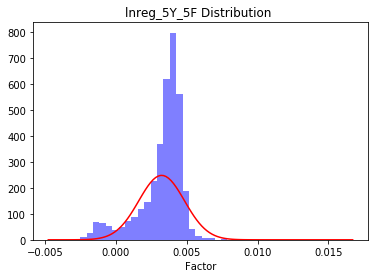

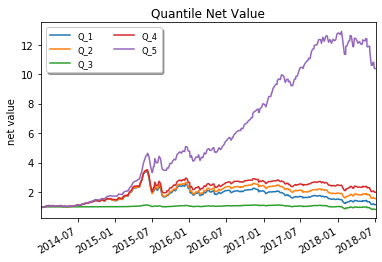

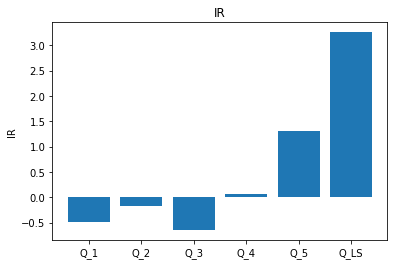

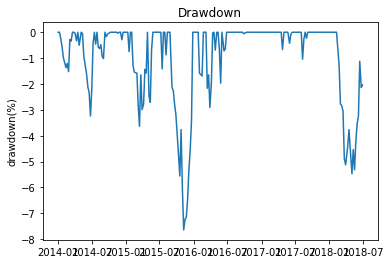

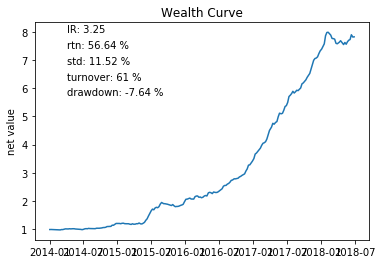

In [48]:
# helper.py has all formulas and plotting functions
%run -i 'helper.py'

# backtestlite.py has XXX
%run -i 'backtestlite.py'

#set the working directory and some initial parameters. 

working_directory = '0 Data/'
#Directory to import the factor you built
factor_path_all = '0 Data/0 New_factors/'

# Define the factor direction, (Descending or Ascending).
# The direction could be observed by the correlation between the factor your built and the stock returns. 
# "Descending" if higher factor score, lower return
# "Ascending" if higher factor score, higher return
direction = "Ascending"
###############################################################

# Parameters of backtest.
start = '20140101' # Time horizon, can be vacation, progrmme will extract the maximum subset.
end = '20180706'
quantile = 5
cycle = 5 # Adjustment Cycle (trading frequency), delay for holidays. 
win = 48 # 48 weeks in a year
year = 2014 # Beginning year of result display (graphs).

#Import stock 5days forward return.
fwdrtn = pd.read_csv(os.path.join(working_directory, "5DForward.csv"), index_col = 0, parse_dates = True).loc[start:end][::cycle]
#Import market 5days forward return.
mkt_index = pd.read_csv(os.path.join(working_directory, "mkt_5DForward.csv"), index_col = 0, parse_dates = True).loc[str(start):str(end),"SH000905"][::cycle]

#You might want to set trading status (whether it is tradable) when you work on bonus question
status = pd.DataFrame(1, index = fwdrtn.index, columns = fwdrtn.columns)
statuslimit = pd.DataFrame(1, index = fwdrtn.index, columns = fwdrtn.columns)

# Revise the factor name (name of .csv file)
factor = "lnreg_5Y_5F"

Type = "LS" # this stand for long-short strategy. 
# Don't change this unless you are confident with the codes in backtestlite.py

def singlefactor(factor,factor_path_all,Type,direction,fwdrtn,mkt_index,cycle, start, end, quantile,win,year, statuslimit):
    factor_path = os.path.join(factor_path_all, factor + '.csv')

    Type1 = "LS"
    B = Backtestlite(factor_path, direction, fwdrtn, mkt_index, factor_path_all, cycle, start, end, quantile, statuslimit)
    B.run(Type1)

    # Drawing
    pic = DrawPicture(factor,direction, B.data,  B.fwdrtn, B.data.index , mkt_index,  B.rtn_data, B.coverage, B.turnover, factor_path_all, Type1)    
    pic.main(win,year,B.rtn_data.columns)
    
# Calculate performances and do the plot
singlefactor(factor,factor_path_all,Type, direction,fwdrtn,mkt_index,cycle, start, end, quantile,win,year, statuslimit)

# Backtesting Simulation(2): SVM Regression Factor

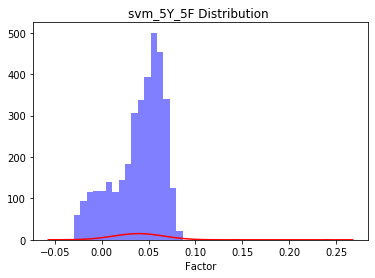

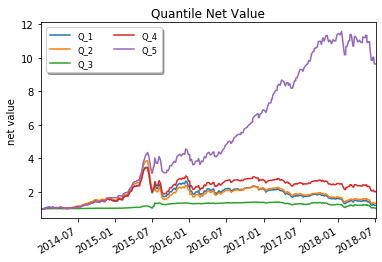

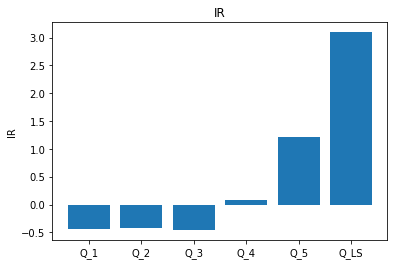

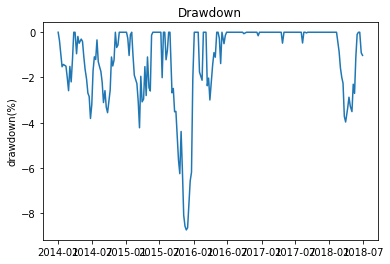

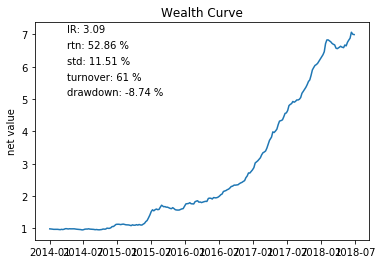

In [49]:
# helper.py has all formulas and plotting functions
%run -i 'helper.py'

# backtestlite.py has XXX
%run -i 'backtestlite.py'

#set the working directory and some initial parameters. 

working_directory = '0 Data/'
#Directory to import the factor you built
factor_path_all = '0 Data/0 New_factors/'

# Define the factor direction, (Descending or Ascending).
# The direction could be observed by the correlation between the factor your built and the stock returns. 
# "Descending" if higher factor score, lower return
# "Ascending" if higher factor score, higher return
direction = "Ascending"
###############################################################

# Parameters of backtest.
start = '20140101' # Time horizon, can be vacation, progrmme will extract the maximum subset.
end = '20180706'
quantile = 5
cycle = 5 # Adjustment Cycle (trading frequency), delay for holidays. 
win = 48 # 48 weeks in a year
year = 2014 # Beginning year of result display (graphs).

#Import stock 5days forward return.
fwdrtn = pd.read_csv(os.path.join(working_directory, "5DForward.csv"), index_col = 0, parse_dates = True).loc[start:end][::cycle]
#Import market 5days forward return.
mkt_index = pd.read_csv(os.path.join(working_directory, "mkt_5DForward.csv"), index_col = 0, parse_dates = True).loc[str(start):str(end),"SH000905"][::cycle]

#You might want to set trading status (whether it is tradable) when you work on bonus question
status = pd.DataFrame(1, index = fwdrtn.index, columns = fwdrtn.columns)
statuslimit = pd.DataFrame(1, index = fwdrtn.index, columns = fwdrtn.columns)

# Revise the factor name (name of .csv file)
factor = "svm_5Y_5F"

Type = "LS" # this stand for long-short strategy. 
# Don't change this unless you are confident with the codes in backtestlite.py

def singlefactor(factor,factor_path_all,Type,direction,fwdrtn,mkt_index,cycle, start, end, quantile,win,year, statuslimit):
    factor_path = os.path.join(factor_path_all, factor + '.csv')

    Type1 = "LS"
    B = Backtestlite(factor_path, direction, fwdrtn, mkt_index, factor_path_all, cycle, start, end, quantile, statuslimit)
    B.run(Type1)

    # Drawing
    pic = DrawPicture(factor,direction, B.data,  B.fwdrtn, B.data.index , mkt_index,  B.rtn_data, B.coverage, B.turnover, factor_path_all, Type1)    
    pic.main(win,year,B.rtn_data.columns)
    
# Calculate performances and do the plot
singlefactor(factor,factor_path_all,Type, direction,fwdrtn,mkt_index,cycle, start, end, quantile,win,year, statuslimit)

# Backtesting Simulation(3): Random Forest Factor


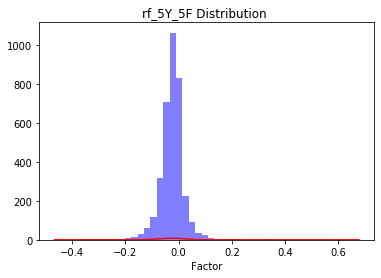

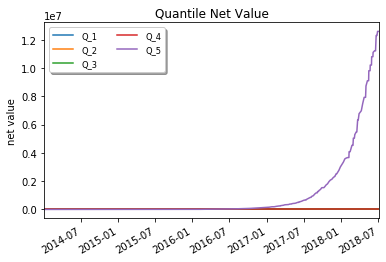

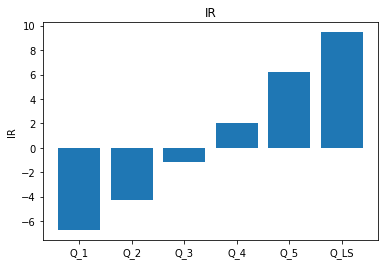

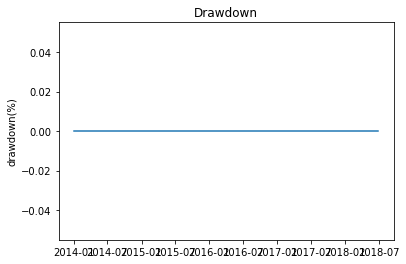

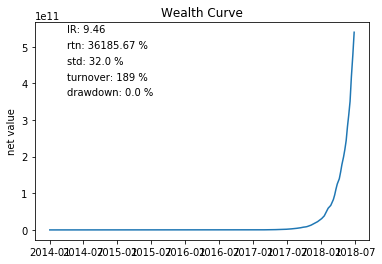

In [48]:
# helper.py has all formulas and plotting functions
%run -i 'helper.py'

# backtestlite.py has XXX
%run -i 'backtestlite.py'

#set the working directory and some initial parameters. 

working_directory = '0 Data/'
#Directory to import the factor you built
factor_path_all = '0 Data/0 New_factors/'

# Define the factor direction, (Descending or Ascending).
# The direction could be observed by the correlation between the factor your built and the stock returns. 
# "Descending" if higher factor score, lower return
# "Ascending" if higher factor score, higher return
direction = "Ascending"
###############################################################

# Parameters of backtest.
start = '20140101' # Time horizon, can be vacation, progrmme will extract the maximum subset.
end = '20180706'
quantile = 5
cycle = 5 # Adjustment Cycle (trading frequency), delay for holidays. 
win = 48 # 48 weeks in a year
year = 2014 # Beginning year of result display (graphs).

#Import stock 5days forward return.
fwdrtn = pd.read_csv(os.path.join(working_directory, "5DForward.csv"), index_col = 0, parse_dates = True).loc[start:end][::cycle]
#Import market 5days forward return.
mkt_index = pd.read_csv(os.path.join(working_directory, "mkt_5DForward.csv"), index_col = 0, parse_dates = True).loc[str(start):str(end),"SH000905"][::cycle]

#You might want to set trading status (whether it is tradable) when you work on bonus question
status = pd.DataFrame(1, index = fwdrtn.index, columns = fwdrtn.columns)
statuslimit = pd.DataFrame(1, index = fwdrtn.index, columns = fwdrtn.columns)

# Revise the factor name (name of .csv file)
factor = "rf_5Y_5F"

Type = "LS" # this stand for long-short strategy. 
# Don't change this unless you are confident with the codes in backtestlite.py

def singlefactor(factor,factor_path_all,Type,direction,fwdrtn,mkt_index,cycle, start, end, quantile,win,year, statuslimit):
    factor_path = os.path.join(factor_path_all, factor + '.csv')

    Type1 = "LS"
    B = Backtestlite(factor_path, direction, fwdrtn, mkt_index, factor_path_all, cycle, start, end, quantile, statuslimit)
    B.run(Type1)

    # Drawing
    pic = DrawPicture(factor,direction, B.data,  B.fwdrtn, B.data.index , mkt_index,  B.rtn_data, B.coverage, B.turnover, factor_path_all, Type1)    
    pic.main(win,year,B.rtn_data.columns)
    
# Calculate performances and do the plot
singlefactor(factor,factor_path_all,Type, direction,fwdrtn,mkt_index,cycle, start, end, quantile,win,year, statuslimit)